# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

# Read and load dataset

In [2]:
heart_df=pd.read_csv(r"C:\Users\Administrator\Downloads\heart.csv")

# Shape , info, column , describe

In [3]:
heart_df.shape

(918, 12)

In [4]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

| No. | Feature Name   | Type / Categories                       | Example | Description                                                                                                 | Importance                                                     |
| --- | -------------- | --------------------------------------- | ------- | ----------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| 1   | Age            | Numeric                                 | 52      | Age of the person in years.                                                                                 | Risk increases with age.                                       |
| 2   | Sex            | Categorical (M/F or 1/0)                | M       | Gender of the person.                                                                                       | Men have higher early risk; women’s risk rises post-menopause. |
| 3   | ChestPainType  | Categorical (TA, ATA, NAP, ASY)         | ATA     | Type of chest pain: TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic. | Indicates type and severity of heart-related pain.             |
| 4   | RestingBP      | Numeric (mm Hg)                         | 130     | Resting blood pressure.                                                                                     | High BP (hypertension) is a major heart disease risk factor.   |
| 5   | Cholesterol    | Numeric (mg/dL)                         | 245     | Serum cholesterol level.                                                                                    | High cholesterol leads to arterial plaque buildup.             |
| 6   | FastingBS      | Binary (0 = <120 mg/dL, 1 = ≥120 mg/dL) | 0       | Fasting blood sugar level.                                                                                  | High sugar indicates diabetes or prediabetes risk.             |
| 7   | RestingECG     | Categorical (Normal, ST, LVH)           | ST      | Resting electrocardiogram results.                                                                          | Detects electrical abnormalities or stress on the heart.       |
| 8   | MaxHR          | Numeric (bpm)                           | 172     | Maximum heart rate achieved during exercise.                                                                | Low MaxHR may indicate poor cardiovascular fitness.            |
| 9   | ExerciseAngina | Binary (Y/N)                            | N       | Exercise-induced angina (chest pain).                                                                       | Suggests limited oxygen flow to the heart under stress.        |
| 10  | Oldpeak        | Numeric (float)                         | 1.4     | ST depression induced by exercise relative to rest.                                                         | Higher values indicate possible ischemia (reduced blood flow). |
| 11  | ST_Slope       | Categorical (Up, Flat, Down)            | Flat    | Slope of the ST segment on ECG.                                                                             | Flat or Down slopes often indicate abnormal heart function.    |
| 12  | HeartDisease   | Binary (0 = No, 1 = Yes)                | 1       | Presence or absence of heart disease.                                                                       | Target variable used for prediction.                           |


In [5]:
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [7]:
for i in heart_df:
    print([i])
    print(heart_df[i].unique())
    print(heart_df[i].nunique())

['Age']
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
50
['Sex']
['M' 'F']
2
['ChestPainType']
['ATA' 'NAP' 'ASY' 'TA']
4
['RestingBP']
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
67
['Cholesterol']
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 2

In [8]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
column=["RestingBP","Cholesterol"]
for col in column:
    heart_df[col]=heart_df[col].replace(0,np.nan)
    mode_value=heart_df[col].median()
    heart_df[col]=heart_df[col].fillna(mode_value)


In [10]:
datadict=pd.DataFrame(heart_df.dtypes)
datadict["missingval"]=heart_df.isnull().sum()
datadict["Nunique"]=heart_df.nunique()
datadict["count"]=heart_df.count()
datadict=datadict.rename(columns={0:"data type"})
datadict

,data type,missingval,Nunique,count
Age,int64,0,50,918
Sex,object,0,2,918
ChestPainType,object,0,4,918
RestingBP,float64,0,66,918
Cholesterol,float64,0,221,918
FastingBS,int64,0,2,918
RestingECG,object,0,3,918
MaxHR,int64,0,119,918
ExerciseAngina,object,0,2,918
Oldpeak,float64,0,53,918


# VISUALIZATION

## A.Univariate Analysis

### 1. Hist Plot

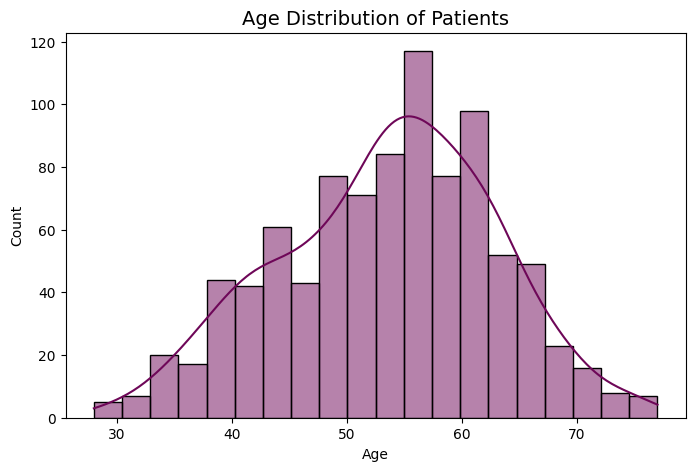

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(heart_df['Age'], bins=20, kde=True, color="#6E0758")  
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Visualization: Histogram or KDE Plot

Variable: Age
Goal: To see how ages are distributed and which age group has more patients, especially those with heart disease.

## 2.Count Plot

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2776\3865240108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=heart_df, palette=["#04F6FABB", "#3FF60D"])


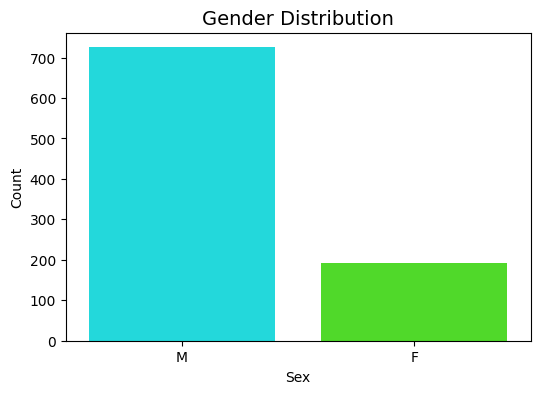

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=heart_df, palette=["#04F6FABB", "#3FF60D"])  
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Visualization: Bar Chart

Variable: Sex
Goal: To compare how many male and female patients are in the dataset.

## B.Bivariate Analysis

### 3.Scatter Plot

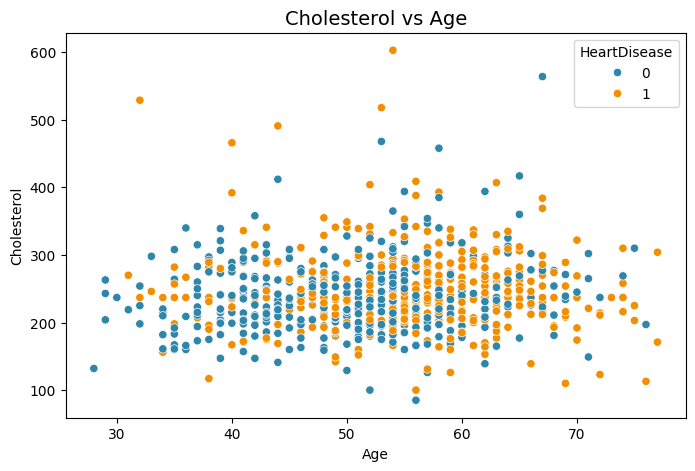

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Cholesterol', data=heart_df, hue='HeartDisease', palette=['#2E86AB', '#F18F01'])  # Blue & Orange
plt.title('Cholesterol vs Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

Visualization: Scatter Plot

Variables: Age vs Cholesterol
Goal: To check the relationship between age and cholesterol, and see if cholesterol increases as people get older.

### 4.Boxplot


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2776\523911661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='MaxHR', data=heart_df, palette=["#F2A412", "#A203E6"])  # Yellow & Purple


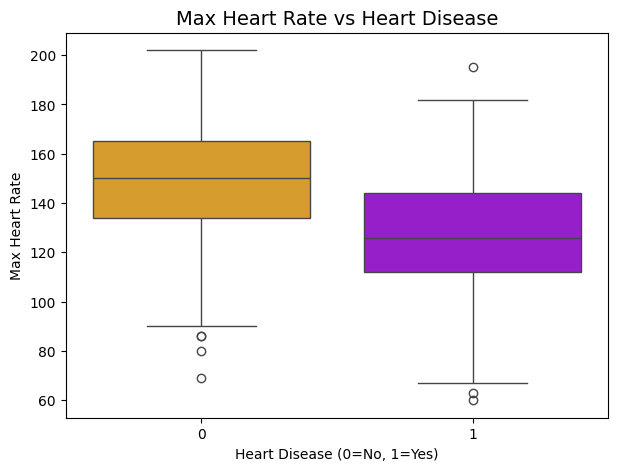

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=heart_df, palette=["#F2A412", "#A203E6"])  # Yellow & Purple
plt.title('Max Heart Rate vs Heart Disease', fontsize=14)
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate')
plt.show()

Visualization: Box Plot

Variables: MaxHR vs HeartDisease
Goal: To compare maximum heart rate of people with and without heart disease.

## C. Multivariate Analysis

### 5.Correlation Heatmap


In [15]:
num_cols=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

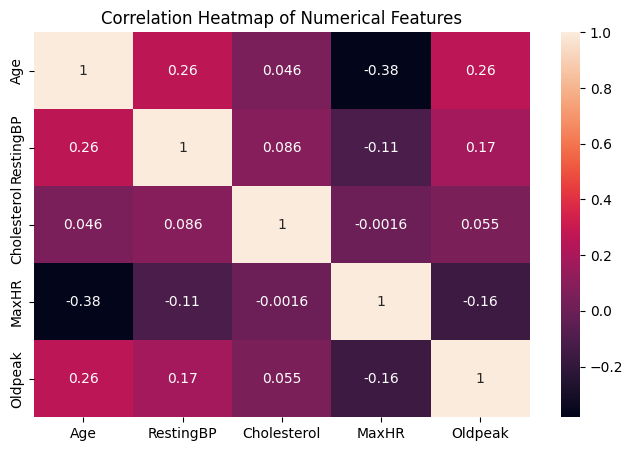

In [16]:

plt.figure(figsize=(8, 5))
sns.heatmap(heart_df[num_cols].corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Visualization: Heatmap (Correlation Matrix)

Variables: All numerical features
Goal: To see which numbers are strongly connected to heart disease and choose the most useful features for prediction.

In [ ]:
## 6. PairPlot (PairGrid) for Numerical Relationships

In [ ]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(heart_df[num_cols + ['HeartDisease']], 
            hue='HeartDisease', 
            diag_kind='kde', 
            palette=["#5F06F9", "#F52804"])  # Blue & Red for heart disease categories
plt.suptitle('PairPlot of Numerical Features by Heart Disease', y=1.02, fontsize=14,corner=True)
plt.show()

# ENCODING 

In [19]:
heart_df=pd.get_dummies(heart_df)
heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130.0,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [20]:
heart_df= heart_df.drop(columns=[
    'Sex_F',                  # drop one from 'Sex'
    'ChestPainType_ASY',      # drop one from 'ChestPainType'
    'RestingECG_LVH',         # drop one from 'RestingECG'
    'ExerciseAngina_N',       # drop one from 'ExerciseAngina'
    'ST_Slope_Down'           # drop one from 'ST_Slope'
])

In [21]:
heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


| Feature          | Simple Meaning                     |
| ---------------- | ---------------------------------- |
| **Age**          | Age of the person                  |
| **RestingBP**    | Blood pressure when resting        |
| **Cholesterol**  | Amount of cholesterol in blood     |
| **FastingBS**    | 1 if blood sugar is high, else 0   |
| **MaxHR**        | Highest heart rate during exercise |
| **Oldpeak**      | Change in ECG level (heart stress) |
| **HeartDisease** | 1 = Heart disease, 0 = Healthy     |


✅ Dummy Categorical Features (Converted into 0 or 1)

These were text categories. Now changed into separate columns with 0 or 1.

Column	Meaning
Sex_M	1 = Male, 0 = Female
ChestPainType_ATA / NAP / TA	Type of chest pain
RestingECG_Normal / ST	ECG condition
ExerciseAngina_Y	1 = Has exercise chest pain, else 0
ST_Slope_Flat / Up	Shape of ST slope in ECG


# SCALING 

Here "ROBUSTSCALER" is best because outliers are not handle  

In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
scaler=RobustScaler()

In [24]:
scaled_data=scaler.fit_transform(heart_df)

In [25]:
heart_df=pd.DataFrame(scaled_data,columns=heart_df.columns)
heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.384615,1.5,-1.075472,0.0,0.500000,0.266667,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.307692,0.0,0.867925,0.0,-1.111111,-0.400000,-1.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0
3,-0.461538,0.4,-0.433962,0.0,-0.833333,0.600000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,1.0,-0.792453,0.0,-0.444444,-0.400000,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.509434,0.0,-0.166667,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
914,1.076923,0.7,-0.830189,1.0,0.083333,1.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.230769,0.0,-2.000000,0.0,-0.638889,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
916,0.230769,0.0,-0.018868,0.0,1.000000,-0.400000,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


After using RobustScaler:

All numeric values become similar in scale.

Large numbers will not overpower small numbers.

It reduces the impact of extreme values (outliers).

The model can learn better and more fairly from the data.

# MODEL BUILDING 

In [26]:
x=heart_df.drop("HeartDisease",axis=1) 

#### heart diesease is the targeted column

In [27]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.384615,1.5,-1.075472,0.0,0.500000,0.266667,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.307692,0.0,0.867925,0.0,-1.111111,-0.400000,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0
3,-0.461538,0.4,-0.433962,0.0,-0.833333,0.600000,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,1.0,-0.792453,0.0,-0.444444,-0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.509434,0.0,-0.166667,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
914,1.076923,0.7,-0.830189,1.0,0.083333,1.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.230769,0.0,-2.000000,0.0,-0.638889,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
916,0.230769,0.0,-0.018868,0.0,1.000000,-0.400000,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [28]:
y=heart_df["HeartDisease"]
y

0     -1.0
1      0.0
2     -1.0
3      0.0
4     -1.0
      ... 
913    0.0
914    0.0
915    0.0
916    0.0
917   -1.0
Name: HeartDisease, Length: 918, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
model=model.fit(x_train,y_train)

In [34]:
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8586956521739131

# Prediction

In [37]:
new_data=[[-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0]]


In [38]:
predicted=model.predict(new_data)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
predicted

array([-1.])